## Equipe :
- [Adevan Neves](https://www.linkedin.com/in/adevancomp/)
- [Paulo Cativo](https://www.linkedin.com/in/paulo-eduardo-ribeiro-cativo-pcd-293607164/)
- [Allef Ramos](https://www.linkedin.com/in/allef-oliveira-ramos-6b8332216/)

### Usando algoritmos não supervisionados de clusterização faça um conjunto de análises no dataset "Unsupervised learning on Country Data" do Kaggle. Seu objetivo é encontrar grupos de países característicos de forma a indicar os que precisam de mais ou menos de ajuda.

### Desenvolver no Kaggle o Notebook (Público) com códigos e comentários sobre as técnicas usadas e resultados encontrados. Submeter via Google Class

In [1]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
countries = pd.read_csv("Country-data.csv")
countries.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [3]:
attrs=list(countries.columns)
print(attrs)

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


## Testes com o algoritmo Kmeans

n_clusters = 2 silhouette_score: 0.7256314906273207
n_clusters = 3 silhouette_score: 0.7003508054481694
n_clusters = 4 silhouette_score: 0.6109297437247547
n_clusters = 5 silhouette_score: 0.572715818235237
n_clusters = 6 silhouette_score: 0.5923323846898451
n_clusters = 7 silhouette_score: 0.5944253756384579
n_clusters = 8 silhouette_score: 0.5964827694227414
n_clusters = 9 silhouette_score: 0.5537820350311363


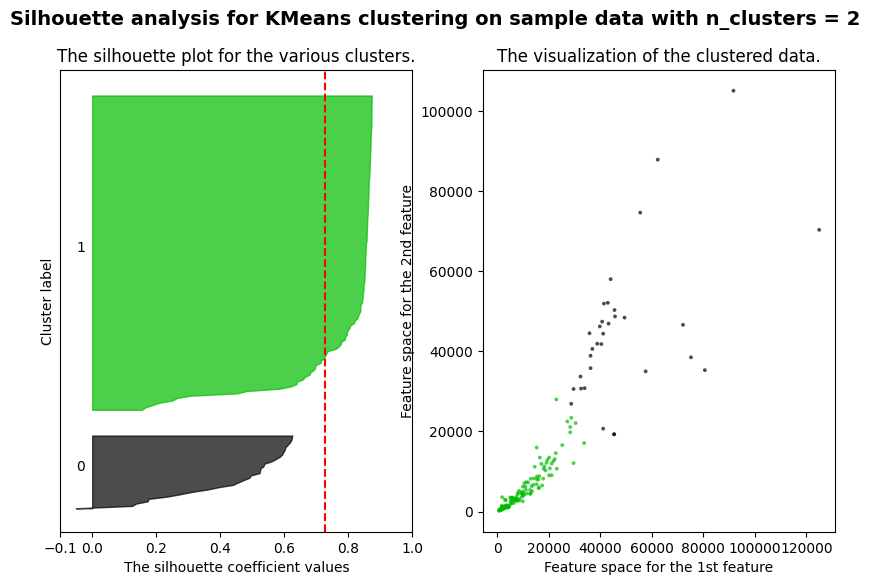

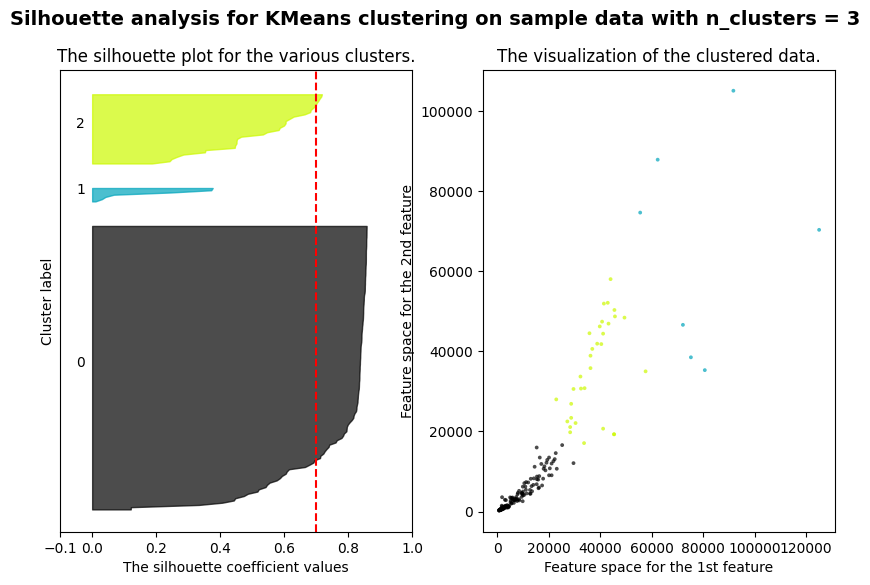

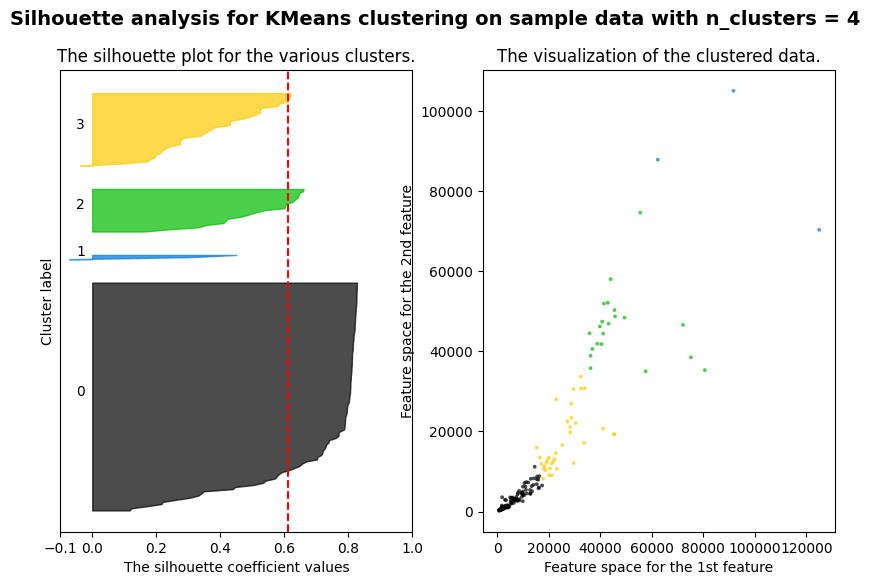

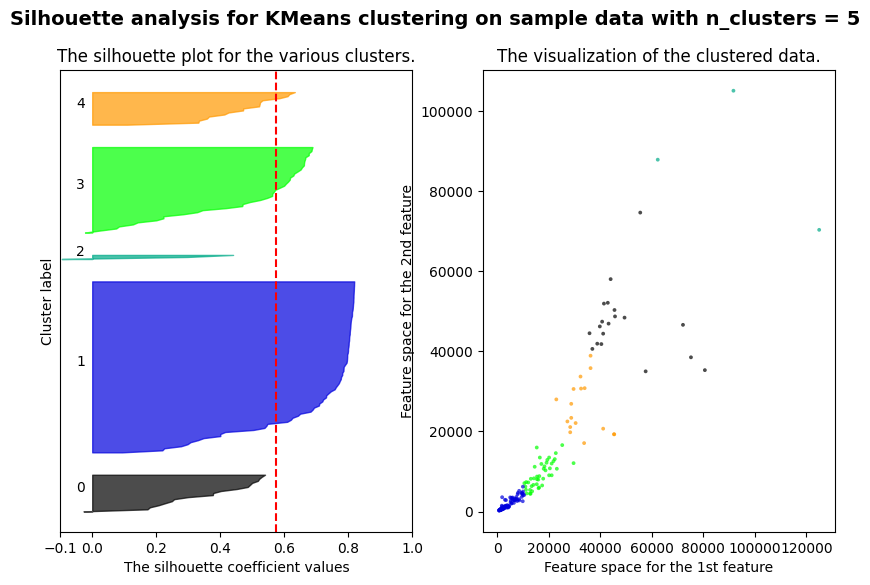

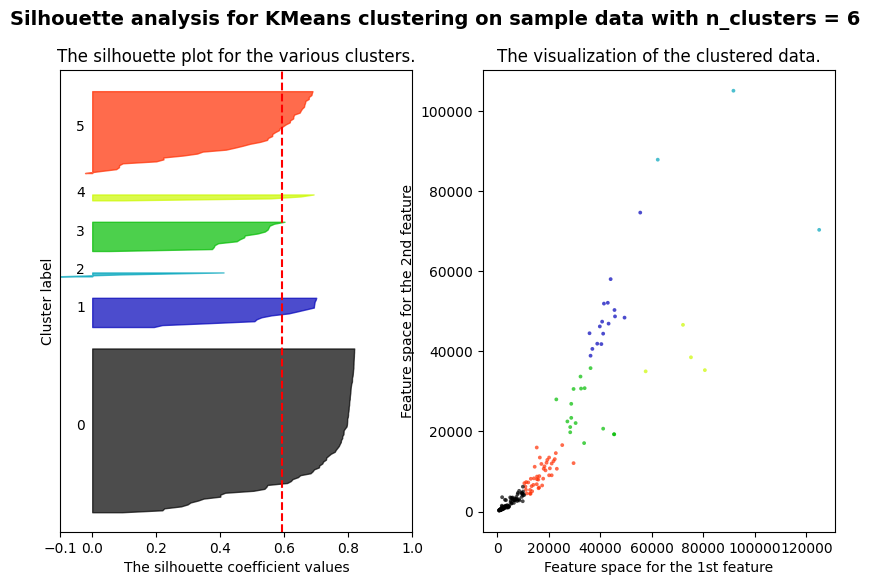

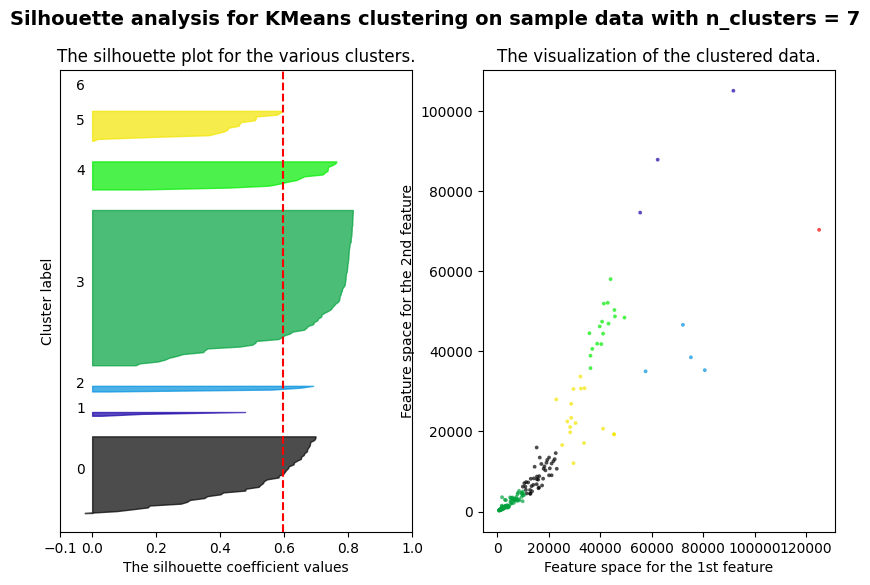

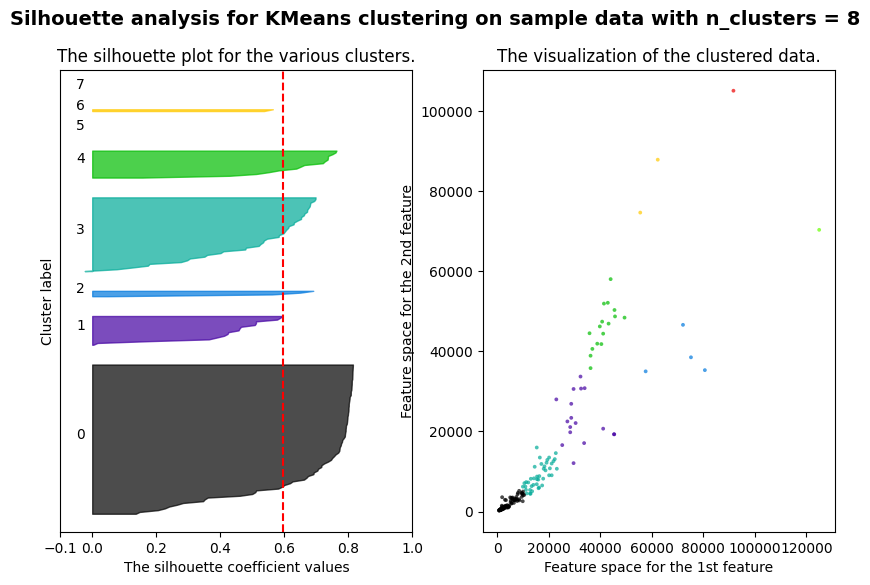

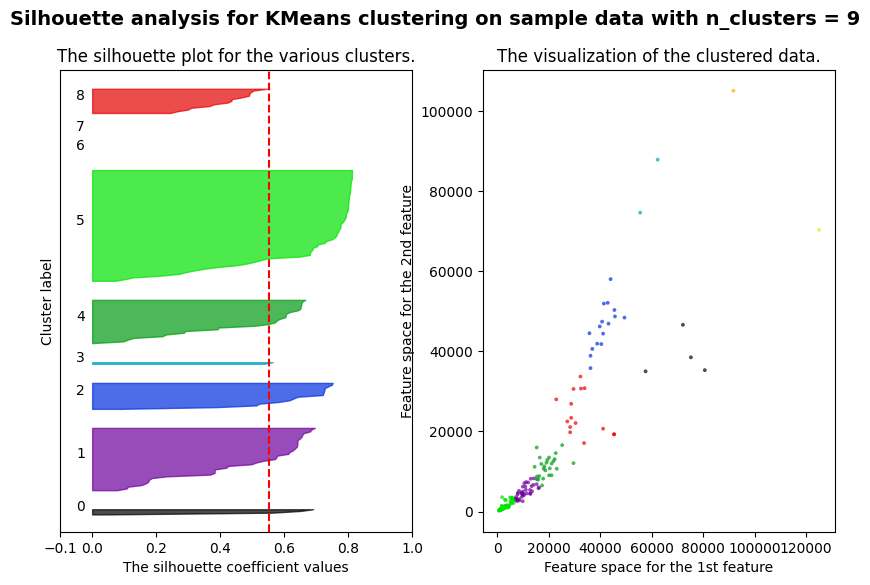

'n_clusters = 4\nkmeans = KMeans(init=\'k-means++\', n_clusters=n_clusters, n_init=10)\nkmeans.fit(countries.drop(\'country\', axis=1))\nplot_clustering(countries, kmeans.labels_, "Kmeans++")'

In [4]:
# 'child_mort' (Mortalidade Infantil) e 'income' (Renda Líquida)
# 'inflation' (Inflação) e 'gdpp' (PIB per capita)
# 'income' (Renda Líquida) e 'life_expec' (Expectativa de vida)

def plot_clustering(data, labels, title=None):
    #attrs_x = ['child_mort', 'inflation', 'income']
    #attrs_y = ['income', 'gdpp', 'life_expec']
    
    attrs_x = ['income','gdpp','income']
    attrs_y = ['gdpp', 'life_expec','child_mort']
    
    for i in range(3):
        x = attrs_x[i]
        y = attrs_y[i]
        data_plot = data[[x, y]]
        x_min = np.min(data_plot[x])
        x_max = np.max(data_plot[x])
        y_min = np.min(data_plot[y])
        y_max = np.max(data_plot[y])
        
        plt.figure(figsize=(6, 4))
        plt.axis([x_min-0.4*x_min, x_max+0.4*x_max, y_min-0.7*y_min, y_max+0.4*y_max])
        for i in range(data.shape[0]):
            plt.text(data_plot[x][i], data_plot[y][i], str(labels[i]),
                     color=plt.cm.Spectral(labels[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})

        plt.xlabel(x)
        plt.ylabel(y)
        if title is not None:
            plt.title(title, size=17)
        plt.tight_layout()

def plot_silhouette(data,range_n_clusters):
    data_plot=data.drop('country', axis=1)
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        #A figura tem 18 por 7 polegadas
        fig.set_size_inches(10, 6)
        
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(data_plot) + (n_clusters + 1) * 10])
        
        kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
        kmeans.fit(countries.drop('country', axis=1))
        
        cluster_labels=kmeans.labels_
        
        silhouette_avg = silhouette_score(data_plot, cluster_labels)
        print(
            "n_clusters =",
            n_clusters,
            "silhouette_score:",
            silhouette_avg,
        )
        sample_silhouette_values = silhouette_samples(data_plot, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples
            
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        
        ax2.scatter(
            #Alterando aqui consigo mostrar a combinação de atributos
            data_plot.loc[:,"income"], data_plot.loc[:,"gdpp"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
        
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )
        
    plt.show()
    
plot_silhouette(countries,[2,3,4,5,6,7,8,9])
    
'''n_clusters = 4
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(countries.drop('country', axis=1))
plot_clustering(countries, kmeans.labels_, "Kmeans++")'''